<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [14]:
!pip install pandas

In [15]:
!pip install matplotlib

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [17]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
(df.head())


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [18]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [19]:
# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Duplicate rows: 0
After removing duplicates: (65437, 114)


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [20]:
print("Missing values in CodingActivities:", df['CodingActivities'].isna().sum())


Missing values in CodingActivities: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [21]:
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

# Confirm
print("Missing values after fill:", df['CodingActivities'].isna().sum())


Missing values after fill: 0


/tmp/ipython-input-1688646200.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


In [22]:
print("Missing values in ConvertedCompYearly:", df['ConvertedCompYearly'].isna().sum())

# Replace NaN with median (you can also use mean or drop rows)
median_val = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_val)


Missing values in ConvertedCompYearly: 42002


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [23]:
print("Columns in dataset:", df.columns)
# Compensation column is 'ConvertedCompYearly'


Columns in dataset: Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [24]:
df['ConvertedCompYearly_MinMax'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) /
    (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
)

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [25]:
df['ConvertedCompYearly_Zscore'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) /
    df['ConvertedCompYearly'].std()
)

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              65000.0                   -0.067513
1              65000.0                   -0.067513
2              65000.0                   -0.067513
3              65000.0                   -0.067513
4              65000.0                   -0.067513


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


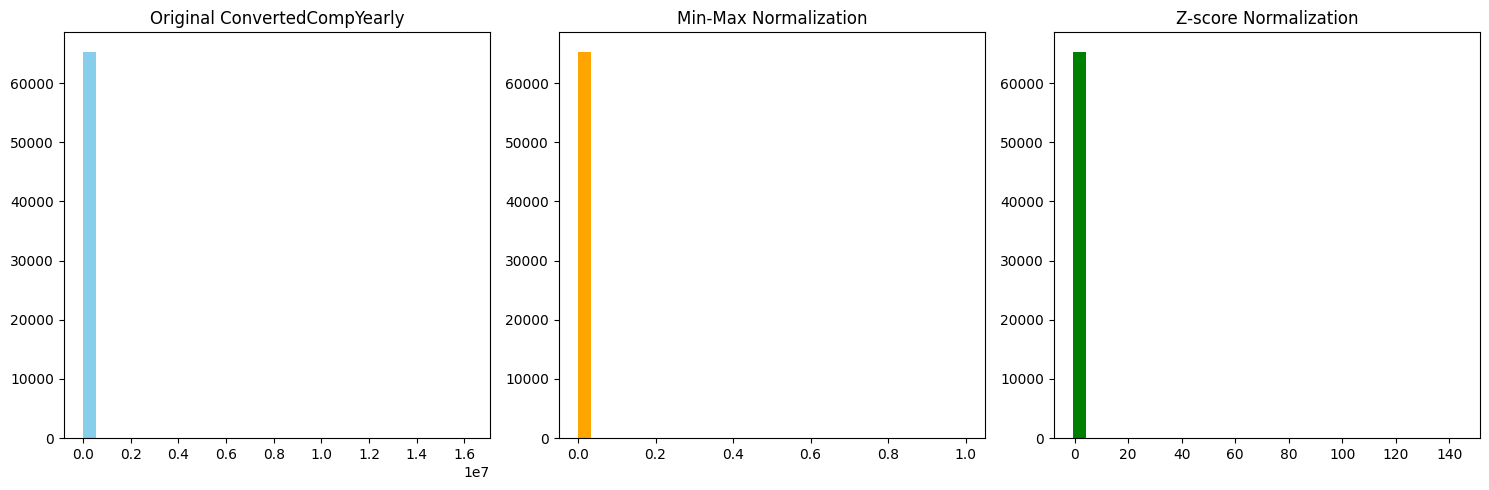

In [26]:
plt.figure(figsize=(15,5))

# Original
plt.subplot(1,3,1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='skyblue')
plt.title("Original ConvertedCompYearly")

# Min-Max
plt.subplot(1,3,2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=30, color='orange')
plt.title("Min-Max Normalization")

# Z-score
plt.subplot(1,3,3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=30, color='green')
plt.title("Z-score Normalization")

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
